In [1]:
import numpy as np
import acoular as ac
import pyfar as pf
import matplotlib.pyplot as plt
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import Delaunay

c:\Users\moinm\anaconda3\envs\eds\Lib\site-packages\numpy\__config__.py:149: UserWarning: Install `pyyaml` for better output
  warnings.warn("Install `pyyaml` for better output", stacklevel=1)
c:\Users\moinm\anaconda3\envs\eds\Lib\site-packages\acoular\__init__.py:10: UserWarning: We detected that Numpy is already loaded and uses OpenBLAS. Because this conflicts with Numba parallel execution, we disable parallel execution for now and processing might be slower. To speed up, either import Numpy after Acoular or set environment variable OPENBLAS_NUM_THREADS=1 before start of the program.
  from .configuration import config


In [2]:

resFileName = "out/beamforming_results_SODIX/2025-01-28_15-59-01_400437/result_2025-01-28_15-59-01_400437"
micgeofile = Path().resolve() / "in/array_position_data/bassoon_cage_64_optimized.xml"
# dotsize = 3
resolution = 0.1

# read Data
result = np.load(resFileName + ".npy")

# start, stop, framerate, frames, frequency_bands, bandwith, resolution, name = pf.io.read(resFileName+".far")
# result_Lp = ac.L_p(result)[4,85]        # convert results in sound pressure Level
# map = result_Lp

# map = np.sum(result, axis=1)[1]
SODIX = result[1,1]
a = np.max(SODIX)
# SODIX = SODIX/a

x_m, y_m, z_m = np.meshgrid(np.linspace(0,1.2,13),
                            np.linspace(0,1.2,13), 
                            np.linspace(0,1.7,18))
x_m = x_m.flatten()
y_m = y_m.flatten()
z_m = z_m.flatten()
grid_pos = np.array([x_m, y_m, z_m]).T

mic_pos = ac.MicGeom(from_file=micgeofile).mpos.T

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# Example data
# grid_pos = np.array([[0.5, 0.5, 0.5], [1, 1, 1], [1.5, 1.5, 1.5]])  # Replace with your actual grid_pos
# mic_pos = np.array([[0, 0, 0], [0, 0, 2], [0, 2, 0], [0, 2, 2],[2, 0, 0], [2, 0, 2], [2, 2, 0], [2, 2, 2]])   # Replace with your actual mic_pos
# SODIX = np.array([[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1]])     # Replace with your actual SODIX

# Initialize the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the grid points
# ax.scatter(grid_pos[:, 0], grid_pos[:, 1], grid_pos[:, 2], c='b', marker='o', label='Grid Points')

#---- optional
# Collect all bubble surface points
all_bubble_surface_points = []
#----

# Plot the bubbles as meshes
for i in range(grid_pos.shape[0]):
    bubble_surface_points = []
    for j in range(mic_pos.shape[0]):
        # Calculate the direction vector from grid_pos to mic_pos
        direction = mic_pos[j] - grid_pos[i]
        direction = direction / np.linalg.norm(direction)  # Normalize the direction vector
        
        # Calculate the bubble surface point
        bubble_surface = grid_pos[i] + direction * SODIX[i, j]
        bubble_surface_points.append(bubble_surface)
        all_bubble_surface_points.append(bubble_surface)
    
    # Convert the list of bubble surface points to a NumPy array
    # bubble_surface_points = np.array(bubble_surface_points)
    
    # # Create a triangular surface plot for the bubble
    # ax.plot_trisurf(bubble_surface_points[:, 0], bubble_surface_points[:, 1], bubble_surface_points[:, 2], color='r', alpha=0.5)

#----optional
# Convert the list of all bubble surface points to a NumPy array
all_bubble_surface_points = np.array(all_bubble_surface_points)

# Create a triangular surface plot for the combined mesh
ax.plot_trisurf(all_bubble_surface_points[:, 0], all_bubble_surface_points[:, 1], all_bubble_surface_points[:, 2], color='r', alpha=0.5)
#----

# Set plot labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Visualization of SODIX with Bubbles')
# ax.legend()
ax.set_xlim([0,1.2])
ax.set_ylim([0,1.2])
ax.set_zlim([0,1.8])
ax.set_aspect('equal')


plt.show()

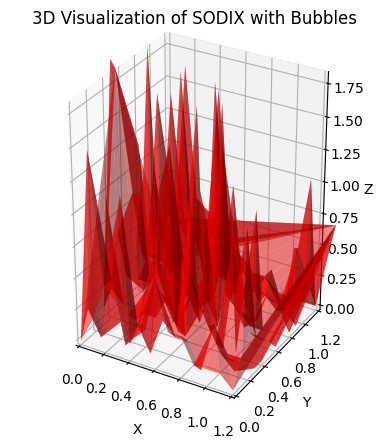

In [ ]:
# calculation of one single mesh"bubble"


# SODIX_restr = SODIX
# SODIX_restr[SODIX_restr < 0.05] = 0

# Initialize the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the grid points
# ax.scatter(grid_pos[:, 0], grid_pos[:, 1], grid_pos[:, 2], c='b', marker='o', label='Grid Points')

# Collect all bubble surface points
all_bubble_surface_points = []

# Plot the bubbles as meshes
for i in range(grid_pos.shape[0]):
    bubble_surface_points = []
    for j in range(mic_pos.shape[0]):
        # Calculate the direction vector from grid_pos to mic_pos
        direction = mic_pos[j] - grid_pos[i]
        direction = direction / np.linalg.norm(direction)  # Normalize the direction vector
        
        # Calculate the bubble surface point
        bubble_surface = grid_pos[i] + direction * SODIX[i, j]#SODIX_restr[i, j]
        # bubble_surface_points.append(bubble_surface)
        all_bubble_surface_points.append(bubble_surface)
    
    # # Create a triangular surface plot for the bubble
    # ax.plot_trisurf(bubble_surface_points[:, 0], bubble_surface_points[:, 1], bubble_surface_points[:, 2], color='r', alpha=0.5)

# Convert the list of all bubble surface points to a NumPy array
all_bubble_surface_points = np.array(all_bubble_surface_points)

# set nan to 0
# all_bubble_surface_points = np.nan_to_num(all_bubble_surface_points)

# Remove duplicate points
all_bubble_surface_points = np.unique(all_bubble_surface_points, axis=0)

# Add a small random perturbation to avoid precision issues
# perturbation = np.random.normal(scale=1e-10, size=all_bubble_surface_points.shape)
# all_bubble_surface_points += perturbation

# Perform Delaunay triangulation
tri = Delaunay(all_bubble_surface_points)

# # Create a triangular surface plot for the combined mesh
ax.plot_trisurf(all_bubble_surface_points[:, 0], all_bubble_surface_points[:, 1], all_bubble_surface_points[:, 2], triangles=tri.simplices, color='r', alpha=0.5)
# ax.plot_trisurf(all_bubble_surface_points[:, 0], all_bubble_surface_points[:, 1], all_bubble_surface_points[:, 2], color='r', alpha=0.5)


# Set plot labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Visualization of SODIX with Bubbles')
# ax.legend()
ax.set_xlim([0,1.2])
ax.set_ylim([0,1.2])
ax.set_zlim([0,1.8])
ax.set_aspect('equal')

plt.show()

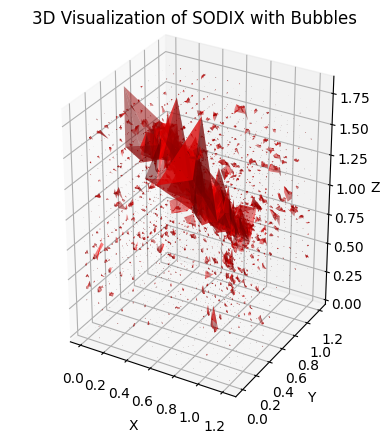

In [ ]:
# calculation of single triangular surfaces

# SODIX_restr = ac.L_p(np.copy(SODIX))*0.01
# SODIX_restr[SODIX_restr < 0.4] = 0.0001
SODIX_restr = SODIX

# SODIX_Lp = 10*np.log10(SODIX_restr)/np.max(10*np.log10(SODIX_restr))

# SODIX_Lp = ac.L_p(SODIX)
# # SODIX_Lp = 10*np.log10(SODIX/0.00000001)#-np.min(np.nan_to_num(10*np.log10(SODIX)))
# # SODIX_Lp = np.nan_to_num(SODIX_Lp)
# # SODIX_Lp = SODIX_Lp/np.max(SODIX_Lp)
# SODIX_Lp[SODIX_Lp<0] = np.nan


max = np.max(SODIX_restr)
min = np.min(SODIX_restr)

# Initialize the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the grid points
# ax.scatter(grid_pos[:, 0], grid_pos[:, 1], grid_pos[:, 2], c='b', marker='o', label='Grid Points')

# Plot the bubbles as meshes
for i in range(grid_pos.shape[0]):
    bubble_surface_points = []
    for j in range(mic_pos.shape[0]):
        # Calculate the direction vector from grid_pos to mic_pos
        direction = mic_pos[j] - grid_pos[i]
        direction = direction / np.linalg.norm(direction)  # Normalize the direction vector
        
        # Calculate the bubble surface point
        bubble_surface = grid_pos[i] + direction * SODIX_restr[i, j] #direction * SODIX[i, j]#
        bubble_surface_points.append(bubble_surface)
    
    # Convert the list of bubble surface points to a NumPy array
    bubble_surface_points = np.array(bubble_surface_points)
    
    # Create a triangular surface plot for the bubble
    ax.plot_trisurf(bubble_surface_points[:, 0], bubble_surface_points[:, 1], bubble_surface_points[:, 2], color='r', alpha=0.5)

# Set plot labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Visualization of SODIX with Bubbles')
# ax.legend()
# ax.set_xlim([0,1.2])
# ax.set_ylim([0,1.2])
# ax.set_zlim([0,1.8])
ax.set_aspect('equal')

plt.show()

In [12]:
# plotly test

import plotly.figure_factory as ff
import plotly.offline as pyo

import numpy as np
from scipy.spatial import Delaunay

startLevel = 0.5

SODIX_restr = ac.L_p(np.copy(SODIX))*0.01


# normalizing Levels
SODIX_restr[SODIX_restr < startLevel] = startLevel
max = np.max(SODIX_restr)
min = np.min(SODIX_restr)
# SODIX_restr = SODIX_restr-startLevel
SODIX_restr = SODIX_restr/max


# Collect all bubble surface points
all_bubble_surface_points = []

# Plot the bubbles as meshes
for i in range(grid_pos.shape[0]):
    bubble_surface_points = []
    for j in range(mic_pos.shape[0]):
        # Calculate the direction vector from grid_pos to mic_pos
        direction = mic_pos[j] - grid_pos[i]
        direction = direction / np.linalg.norm(direction)  # Normalize the direction vector
        
        # Calculate the bubble surface point
        bubble_surface = grid_pos[i] + direction * SODIX_restr[i, j] #direction * SODIX[i, j]#direction * SODIX_restr[i, j]#
        bubble_surface_points.append(bubble_surface)
        all_bubble_surface_points.append(bubble_surface)

    
    # Convert the list of bubble surface points to a NumPy array
    # bubble_surface_points = np.array(bubble_surface_points)
    
    # try:
    #     tri = Delaunay(bubble_surface_points)
    # except Exception as e:
    #     print("Delaunay triangulation failed:", e)
    #     raise
    # simplices = tri.convex_hull

    # fig = ff.create_trisurf(x = bubble_surface_points[:, 0], y = bubble_surface_points[:, 1], z = bubble_surface_points[:, 2],
    #                         simplices=simplices,
    #                         title=dict(text="source directivity visualisation"), aspectratio=dict(x=1, y=1, z=1))

all_bubble_surface_points = np.array(all_bubble_surface_points)

try:
    tri = Delaunay(all_bubble_surface_points)
except Exception as e:
    print("Delaunay triangulation failed:", e)
    raise
simplices = tri.convex_hull

fig = ff.create_trisurf(x = all_bubble_surface_points[:, 0], y = all_bubble_surface_points[:, 1], z = all_bubble_surface_points[:, 2],
                        simplices=simplices,
                        title=dict(text="source directivity visualisation"), aspectratio=dict(x=1, y=1, z=1))







# # Set plot labels and title
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# ax.set_title('3D Visualization of SODIX with Bubbles')
# # ax.legend()
# # ax.set_xlim([0,1.2])
# # ax.set_ylim([0,1.2])
# # ax.set_zlim([0,1.8])
# ax.set_aspect('equal')

# plt.show()
# fig.show()
pyo.plot(fig, filename='3dplot.html')

'3dplot.html'